In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import csv
import datetime
from dateutil.parser import parse
from pandas.tools.plotting import scatter_matrix
from patsy import dmatrices
import statsmodels.formula.api as smf
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
from numpy.random import randn
from scipy import stats
from pprint import pprint as pp
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import urllib2

%matplotlib inline

sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})

In [3]:
congressrl = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

newrl         = urllib2.urlopen(congressrl)
df            = pd.read_csv(newrl, header=-1)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
df            = df.replace(['y'], [1])
df            = df.replace(['n'], [0])
df = df.replace("?", np.nan)

for num in list(xrange(1,17)):
    df[num] = df[num].replace(np.nan, df[num].mean())

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000
1,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689
2,democrat,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000
3,democrat,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000
4,democrat,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000


In [5]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.44208,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.576190,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.49030,0.472136,0.484876,0.487424,0.491847,0.474000,0.487920,0.486125,0.487752,0.496510,0.469464,0.476695,0.485886,0.482078,0.479083,0.340732
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.812689
50%,0.00000,0.503876,1.000000,0.000000,0.504762,1.000000,1.000000,1.000000,0.501211,0.504673,0.000000,0.000000,0.509756,1.000000,0.000000,1.000000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# CHALLENGE THREE

me_range = list(xrange(1,30))
x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]
x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]

scores = []
for num in me_range:
    model   = KNeighborsClassifier(n_neighbors=num)
    model.fit(x_train, y_train)
    y_pred  = model.predict(x_test)
    a_score = accuracy_score(y_test, y_pred)
    scores.append((num, a_score))

# print scores
print "K VALUE WITH HIGHEST ACCURACY:"
scores.sort(key=lambda x: x[1])
print scores[-1][0], scores[-1][1]
# print "Sorted scores list (k value, accuracy score)"
# print scores

K VALUE WITH HIGHEST ACCURACY:
4 0.954022988506


267 168


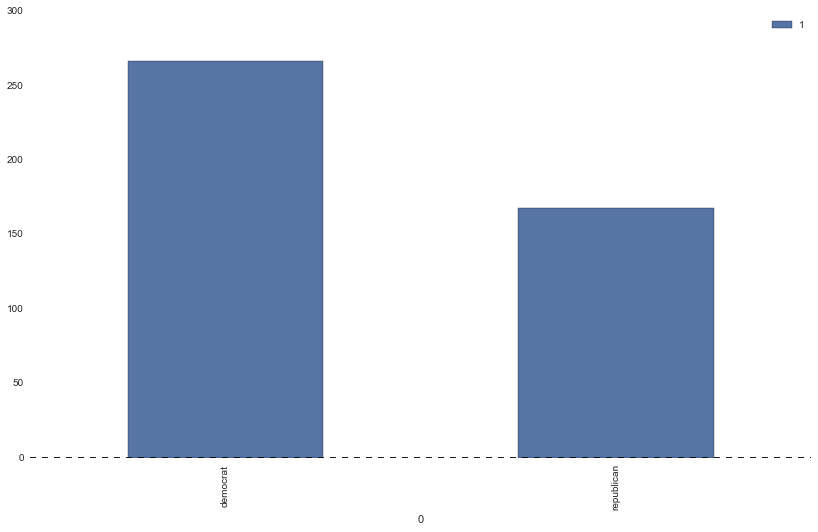

In [7]:

num_dems, num_reps = df.stack().value_counts()[2], df.stack().value_counts()[3]
print num_dems, num_reps
df.head()
ndf = df[[0, 1]]
ndf.head()
ndf2 = ndf.groupby([0]).count()
ndf2.head()
ndf2.plot(kind="bar")

In [13]:
train, test     = train_test_split(df, train_size = 0.8)

me_range = list(xrange(1,30))

x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]

x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]

def dem_list(X):
  return ("democrat "*len(X)).strip().split()

def rep_list(X):
  return ("republican "*len(X)).strip().split()

model   = LogisticRegression()
model.fit(x_train, y_train)
y_pred  = dem_list(list(xrange(1,88)))
a_score = accuracy_score(y_test, y_pred)
y_pred  = rep_list(list(xrange(1,88)))
b_score = accuracy_score(y_test, y_pred)

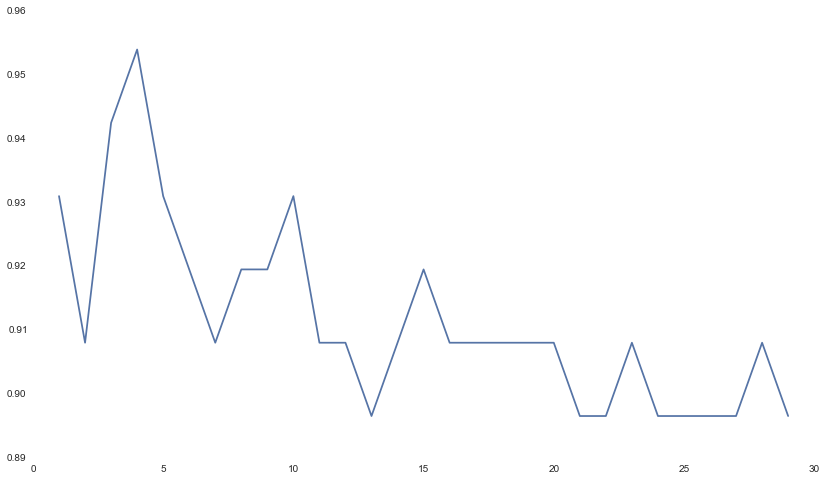

In [39]:
# Challenge 6
my_y, my_x = [], []
for my_tuple in scores:
    my_y.append(my_tuple[0])
    my_x.append(my_tuple[1])
plt.plot(my_y, my_x)

In [20]:
from sklearn.learning_curve import learning_curve

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

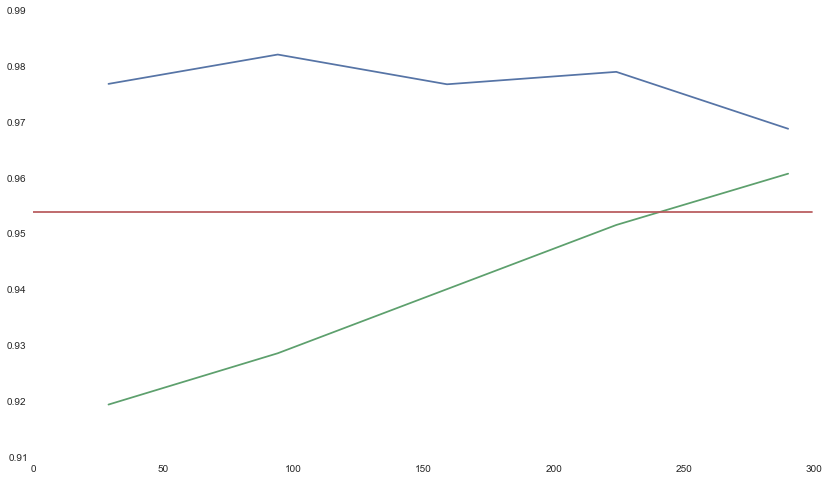

In [56]:
model                   = LogisticRegression()
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
m, train_err, test_err  = learning_curve(model, x_all, y_all)
train_cv_err            = np.mean(train_err,axis=1)
test_cv_err             = np.mean(test_err,axis=1)
plt.plot(m, train_cv_err, label="Training")
plt.plot(m, test_cv_err, label="Test")
knn_x = np.arange(0, 300)
knn_y = [scores[-1][1]]*300
print knn_x
plt.plot(knn_x, knn_y, label="KNN")